<a href="https://colab.research.google.com/github/skamble91/BigDL/blob/master/AI_ML_capstoneAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI and Machine learning Class Capstone project**
 **Background**


AAA Northeast is one of the regional clubs comprising the American Automobile Association.  AAA Northeast covers Rhode Island, Connecticut, Massachusetts and portions of New York and New Jersey.  The American Automobile Association has 58 million members in the US and Canada.  They offer services such as roadside assistance, maps and various discounts as part of their services.  Roadside assistance is a costly benefit, particularly towing.  Members who frequently use roadside assistance are less desirable.

AAA also offers other paid services at highly competitive prices.  They also offer insurance, travel and banking/loan products.  AAA would like to increase the penetration of these services.

A member may have a standard membership or a premium membership covering themselves and optionally additional household members.  Many of AAA members typically have a long tenure with the club.

**Objectives**

Provide a market segmentation of AAA members (or member households) that allows AAA Northeast to better serve their members.  They would use this analysis to:
1.   Better anticipate the needs of members
2.   Customize communications and offering to various segments
3.   Expend more effort driving acquisition and renewal of desirable members

We'll work with the members at the household level.

Importing packages necessary

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet

exploring the data 

In [0]:
member_df=pd.read_csv("member_sample.csv", index_col=0)
member_df.head()
member_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


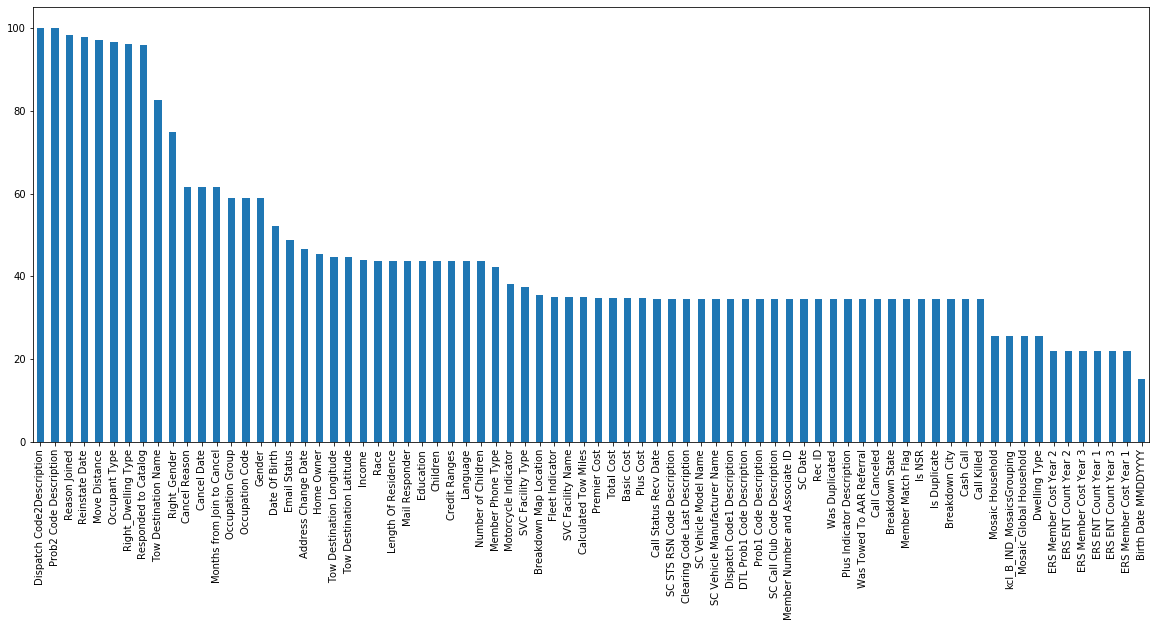

In [0]:
#underdstanding missing data
nulls_percent=member_df.isnull().sum()/len(member_df)*100
nulls_percent=nulls_percent[nulls_percent>2]
nulls_percent.nlargest(100).plot(kind="bar", figsize=(20,8))

Exploring all the null datasets to check what we can do to replace null values


In [0]:
#looking at date of birth .. looking at nulls and calculating age
from datetime import date
member_df['Birth Date MMDDYYYY']=pd.to_datetime(member_df['Birth Date MMDDYYYY'])
def calculate_age(born):
    today = date.today()
    if type(born)==float:
      return None
    else:
      return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

member_df['Age']=member_df['Birth Date MMDDYYYY'].apply(calculate_age)


In [0]:

member_df['Birth Date MMDDYYYY'].fillna('Unknown', inplace=True)
Date_nulls=member_df.where(member_df['Birth Date MMDDYYYY']=='Unknown')
print(Date_nulls.groupby('Member Status')['Birth Date MMDDYYYY'].count())
Non_null_date=member_df.where(member_df['Birth Date MMDDYYYY']!='Unknown')
print(Non_null_date.groupby('Member Status')['Birth Date MMDDYYYY'].count())

Member Status
ACTIVE        309
CANCELLED    2899
PENDING        41
Name: Birth Date MMDDYYYY, dtype: int64
Member Status
ACTIVE       11499
CANCELLED     5278
PENDING       1317
Name: Birth Date MMDDYYYY, dtype: int64


if we look at only active members we can ignore the nulls because they are only 309 out of 11499 that is 2.6% 


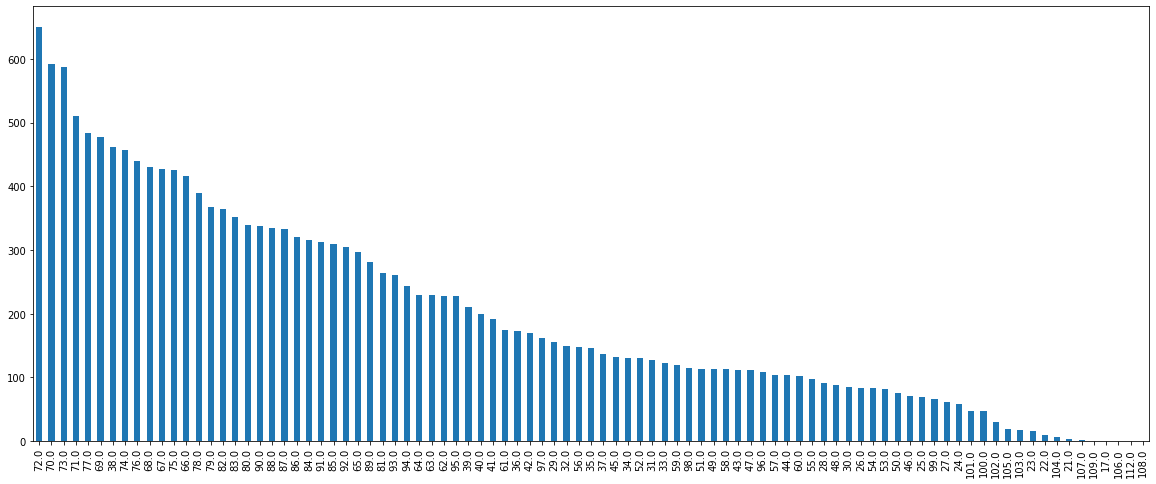

In [0]:
member_df['Age'].value_counts().nlargest(100).plot(kind="bar", figsize=(20,8))

,count,mean,std,min,25%,50%,75%,max
Age Buckets,,,,,,,,
Baby Boomers,4674.0,47.923755,25.586514,0.0,32.0,53.0,53.0,588.00
Gen X,1324.0,47.170929,23.504939,0.0,30.5,53.0,53.0,247.85
Gen Z,1.0,53.000000,NaN,53.0,53.0,53.0,53.0,53.00
data issue,414.0,45.344662,23.711596,0.0,30.0,53.0,53.0,274.63
millenials,1754.0,47.668238,236.212792,0.0,29.0,53.0,53.0,9869.00
silent generation,5777.0,46.788766,24.184823,0.0,32.0,53.0,53.0,566.50


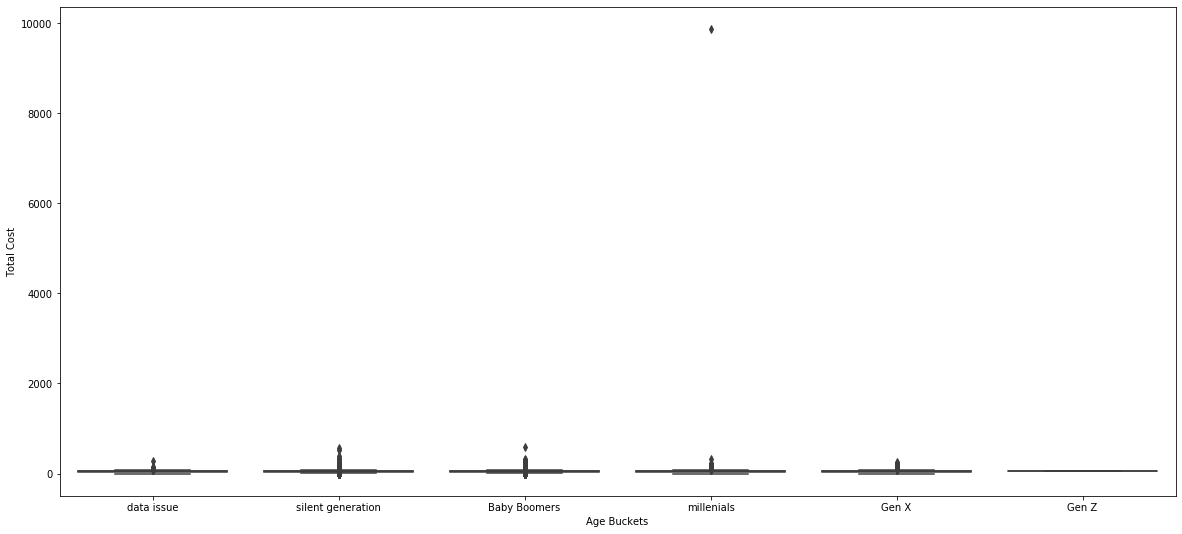

In [0]:
# creating age buckets 
def age_buckets(age): 
  if age>12 and age<=18:
    return "Gen Z"
  elif age>18 and age <=39:
    return "millenials"
  elif age>39 and age <=54:
    return "Gen X"
  elif age>54 and age<=73:
    return "Baby Boomers"
  elif age>73:
    return "silent generation"
  else:
    return "data issue"

member_df['Age Buckets']=member_df['Age'].apply(age_buckets)
#member_df['Age Buckets'].value_counts().plot(kind="bar", figsize=(20,8))
#only active members analysis
member_df_active=member_df.where(member_df['Member Status']=='ACTIVE')
member_df['Age Buckets'].value_counts()
plt.figure(figsize=(20,9))
sns.boxplot(x="Age Buckets", y="Total Cost", data=member_df)
member_df.groupby('Age Buckets')['Total Cost'].describe()

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(member_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,114
Number of observations,21344
Total Missing (%),28.7%
Total size in memory,18.6 MiB
Average record size in memory,912.0 B
Numeric,26
Categorical,75
Boolean,2
Date,0
Text (Unique),0
Rejected,10
